In [66]:
import yfinance as yf
import pandas   as pd
import numpy    as np
import matplotlib.pyplot as plt

from utils import *



In [67]:
xau = yf.Ticker("GLD").history(period="2y",interval = '1h')
xau  = xau['Close'].dropna()
# btc=btc['2016':]


In [68]:
xau

2020-11-05 09:30:00-05:00    182.369995
2020-11-05 10:30:00-05:00    182.649994
2020-11-05 11:30:00-05:00    182.375000
2020-11-05 12:30:00-05:00    182.615005
2020-11-05 13:30:00-05:00    182.848999
                                ...    
2022-11-04 12:30:00-04:00    155.789993
2022-11-04 13:30:00-04:00    156.020004
2022-11-04 14:30:00-04:00    156.404999
2022-11-04 15:30:00-04:00    156.479996
2022-11-04 16:00:00-04:00    156.470001
Name: Close, Length: 3520, dtype: float64

<AxesSubplot:>

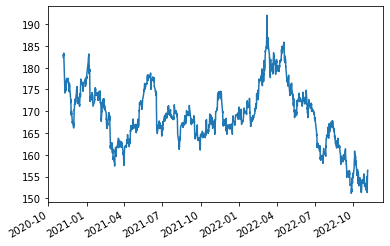

In [39]:
(xau).plot()

In [69]:
def sma(data_levels,params = [5,15]):
    
    data = pd.DataFrame(data_levels).copy()
    
    data['SMA_{}'.format(params[0])]  = data.iloc[:,0].rolling(params[0]).mean()
    data['SMA_{}'.format(params[1])]  = data.iloc[:,0].rolling(params[1]).mean()

    data = data.dropna()

    signals = []

    for i in range(len(data)):
        
        ## if SMA > current price = buy
        if data['SMA_{}'.format(params[0])].iloc[i] > data['SMA_{}'.format(params[1])].iloc[i]:
            signals.append(1)
        
        # if SMA < current price = sell
        if data['SMA_{}'.format(params[0])].iloc[i] < data['SMA_{}'.format(params[1])].iloc[i]:
            signals.append(0)
            
        # if SMA == current price = do nothing (this wont happen)
        if data['SMA_{}'.format(params[0])].iloc[i] == data['SMA_{}'.format(params[1])].iloc[i]:
            signals.append(0)
    data['Signals'] = signals
    
    return data

In [65]:
sma(xau)


,Close,SMA_5,SMA_15,Signals
2020-11-11 09:30:00-05:00,175.040100,175.793024,175.531435,1
2020-11-11 10:30:00-05:00,175.020004,175.571024,175.536335,1
2020-11-11 11:30:00-05:00,174.695007,175.284024,175.570002,0
2020-11-11 12:30:00-05:00,174.830002,175.055023,175.562003,0
2020-11-11 13:30:00-05:00,174.889999,174.895023,175.606003,0
...,...,...,...,...
2022-11-04 12:30:00-04:00,155.789993,154.893002,153.169554,1
2022-11-04 13:30:00-04:00,156.020004,155.733002,153.348221,1
2022-11-04 14:30:00-04:00,156.404999,155.889001,153.443221,1
2022-11-04 15:30:00-04:00,156.479996,156.087000,153.698554,1


In [70]:
signals = sma(xau)['Signals']
xau = xau[signals.index[0]:]


In [71]:
returns = backtester(signals,xau)
dd = max_dd(returns.pct_change().dropna().values.ravel())
wr = win_rate(pd.Series(signals), returns)

<AxesSubplot:>

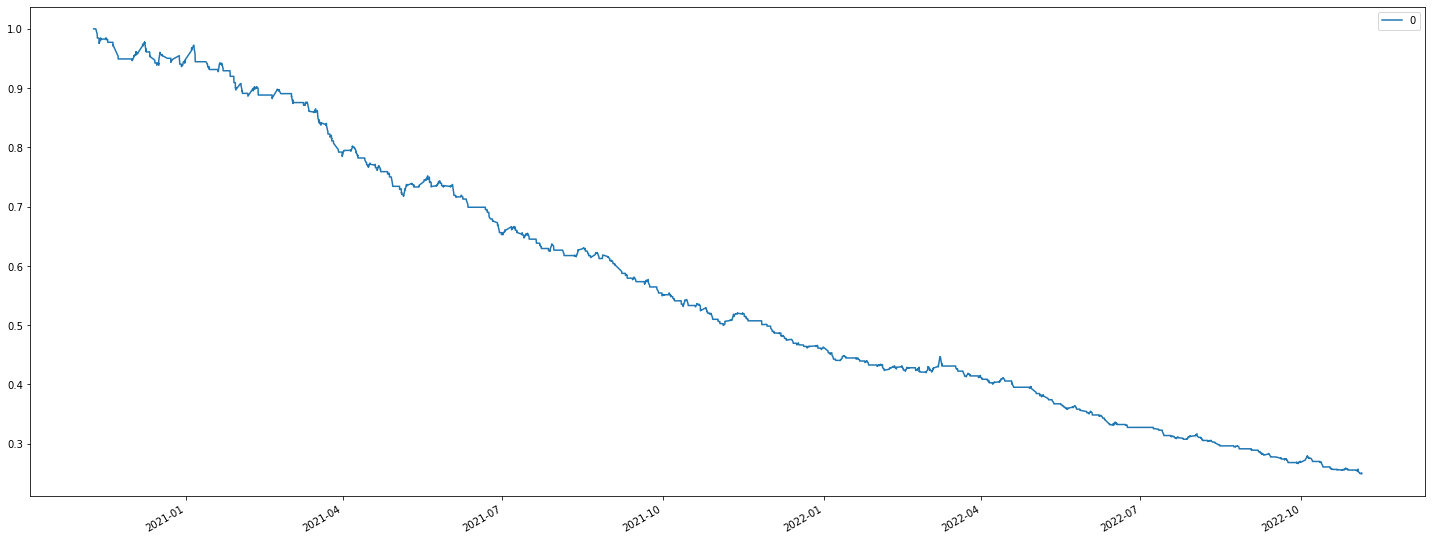

In [58]:
returns.plot(figsize=(25,10))

In [59]:
dd

-0.7509801231344088

In [72]:
wr

0.2240296803652968

In [73]:
display('Strat',(returns.iloc[-1]-1)[0])
display('Xau',(xau/xau[0]).iloc[-1]-1)

'Strat'

-0.7498128993012755

'Xau'

-0.10561229393681493

<AxesSubplot:>

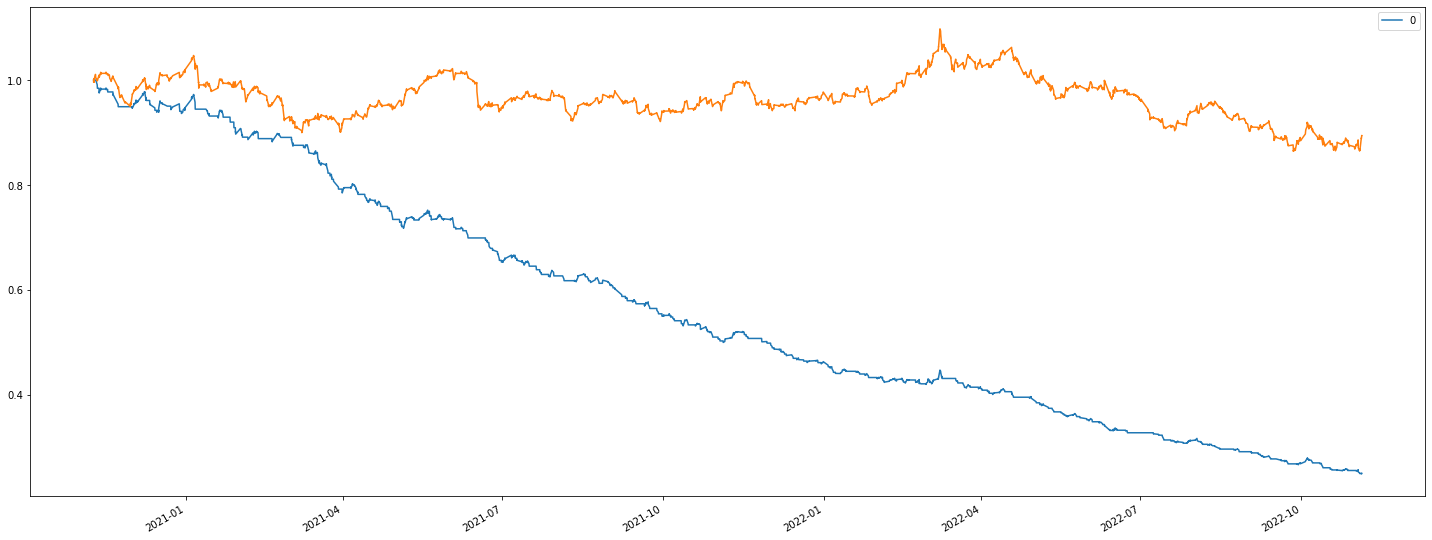

In [64]:
returns.plot(figsize=(25,10))
(xau/xau[0]).plot()